#DSCI 631: Long Short-term Memory Model on Apple Stock Prices

Group Members
1.	Vijval Vemula: vv354@drexel.edu
2.	Tyler Brenner: tb3327@drexel.edu
3.	Priyanka Patil: pp673@drexel.edu

In [ ]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.losses import mean_squared_error
import matplotlib.pyplot as plt

np.set_printoptions(threshold = np.inf)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)





<Axes: xlabel='Date'>

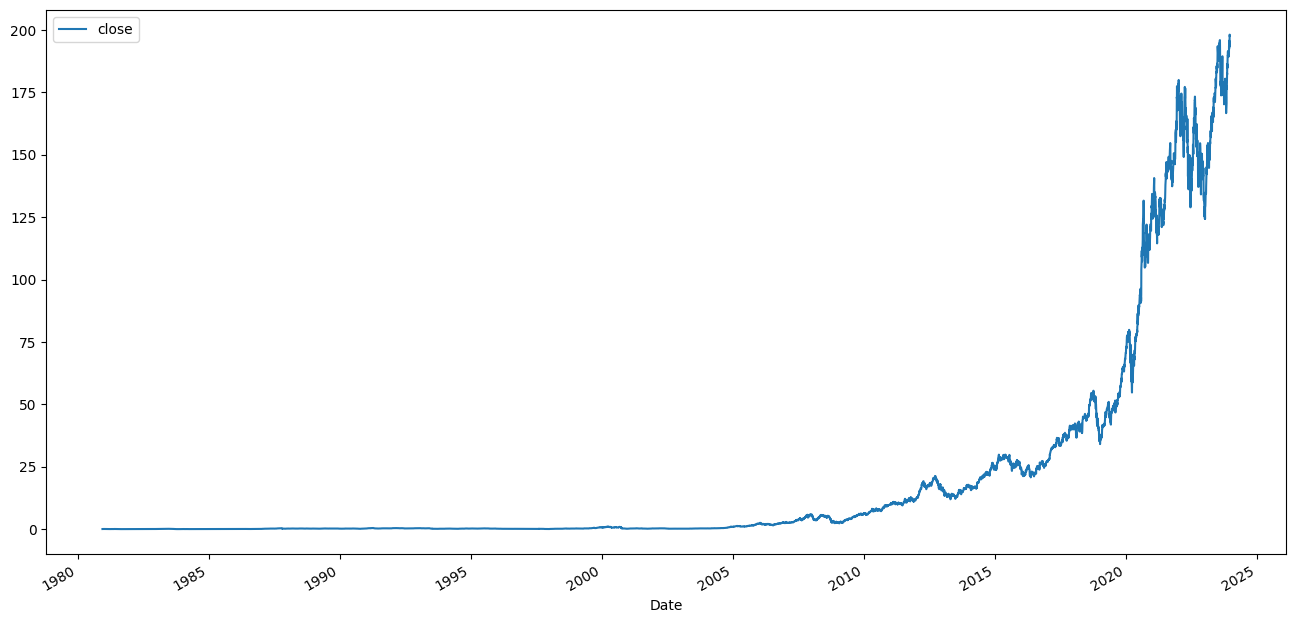

In [ ]:
aapl = yf.Ticker("AAPL")
df = aapl.history(period = "max")
df = df.rename(columns = lambda x : x.lower())
df["adj_close"] = df["close"] - df["dividends"]
del df["dividends"]
del df["stock splits"]
df.plot.line(y = "close", use_index = True, figsize = (16, 8))

We have trundated the dataset, till 2012 to till date

<Axes: xlabel='Date'>

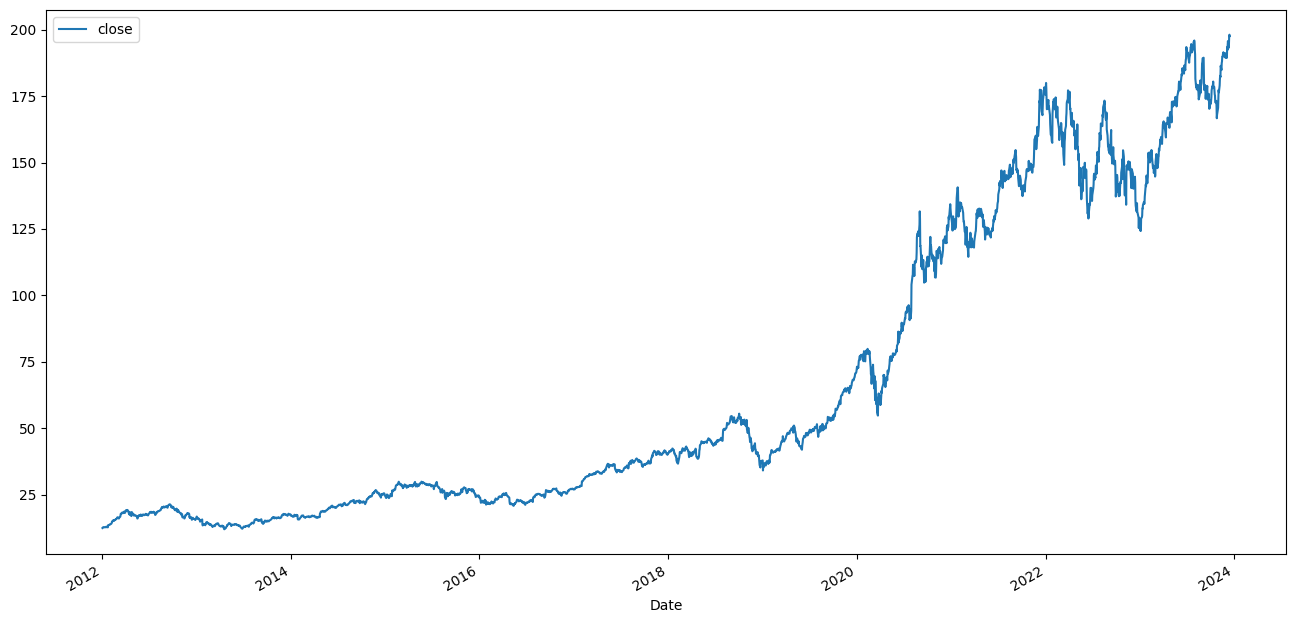

In [ ]:
df = df.loc["2012-01-01" : ].copy()
df.plot.line(y = "close", use_index = True, figsize = (16, 8))

In [ ]:
df

,open,high,low,close,volume,adj_close
Date,,,,,,
2012-01-03 00:00:00-05:00,12.394288,12.488138,12.382178,12.449689,302220800,12.449689
2012-01-04 00:00:00-05:00,12.412452,12.554137,12.390655,12.516596,260022000,12.516596
2012-01-05 00:00:00-05:00,12.562313,12.671300,12.493287,12.655558,271269600,12.655558
2012-01-06 00:00:00-05:00,12.708231,12.798448,12.691580,12.787852,318292800,12.787852
2012-01-09 00:00:00-05:00,12.881707,12.949824,12.756068,12.767572,394024400,12.767572
2012-01-10 00:00:00-05:00,12.894116,12.896841,12.760606,12.813284,258196400,12.813284
2012-01-11 00:00:00-05:00,12.796330,12.801477,12.694306,12.792395,215084800,12.792395
2012-01-12 00:00:00-05:00,12.784223,12.802992,12.677354,12.757278,212587200,12.757278
2012-01-13 00:00:00-05:00,12.706116,12.728821,12.674630,12.709445,226021600,12.709445


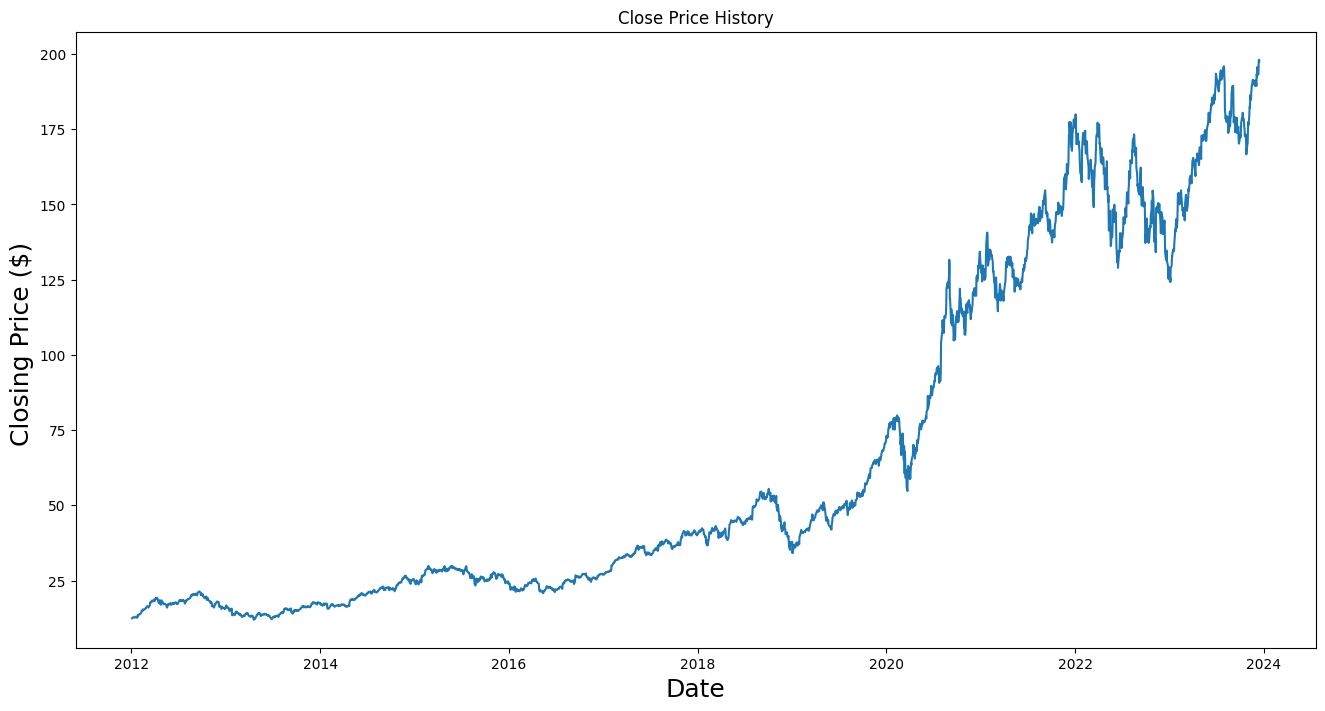

In [ ]:
plt.figure(figsize = (16, 8))
plt.title("Close Price History")
plt.plot(df["close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closing Price ($) ", fontsize = 18)
plt.grid(False)
plt.show()

In [ ]:
dataset = np.reshape(df["close"].values, (df.shape[0], 1)) #Extracxting only closing prices
dataset

array([[ 12.44968891],
       [ 12.51659584],
       [ 12.65555763],
       [ 12.78785229],
       [ 12.7675724 ],
       [ 12.81328392],
       [ 12.79239464],
       [ 12.75727844],
       [ 12.709445  ],
       [ 12.85748672],
       [ 12.99099636],
       [ 12.94982529],
       [ 12.72427845],
       [ 12.93952751],
       [ 12.72760963],
       [ 13.5223074 ],
       [ 13.46085262],
       [ 13.54108047],
       [ 13.71455193],
       [ 13.81960201],
       [ 13.81081867],
       [ 13.77842903],
       [ 13.9164772 ],
       [ 14.04635334],
       [ 14.19349194],
       [ 14.43113995],
       [ 14.9303627 ],
       [ 14.93793583],
       [ 15.21585083],
       [ 15.42353058],
       [ 15.06659794],
       [ 15.20404625],
       [ 15.2013216 ],
       [ 15.58671761],
       [ 15.53191757],
       [ 15.63333321],
       [ 15.81558132],
       [ 15.91700077],
       [ 16.20915031],
       [ 16.42197609],
       [ 16.48343277],
       [ 16.5049305 ],
       [ 16.14103317],
       [ 16

In [ ]:
train_len = math.ceil(len(dataset) * 0.8)
train_len, len(dataset)

(2408, 3009)

Since the model will take value from 0 to 1 we have scaled the train and test values into this range using  min max scaler even predictions are in these range only.  So,  we performed an inverse transform bring the predictions back to their original scale. ​

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[2.42952358e-03],
       [2.78902086e-03],
       [3.53567576e-03],
       [4.24650750e-03],
       [4.13754175e-03],
       [4.38315407e-03],
       [4.27091398e-03],
       [4.08223132e-03],
       [3.82521770e-03],
       [4.62065994e-03],
       [5.33801988e-03],
       [5.11680380e-03],
       [3.90491923e-03],
       [5.06147287e-03],
       [3.92281800e-03],
       [8.19280450e-03],
       [7.86260218e-03],
       [8.29367404e-03],
       [9.22575261e-03],
       [9.79019670e-03],
       [9.74300297e-03],
       [9.56897036e-03],
       [1.03107163e-02],
       [1.10085531e-02],
       [1.17991427e-02],
       [1.30760481e-02],
       [1.57584193e-02],
       [1.57991104e-02],
       [1.72923741e-02],
       [1.84082571e-02],
       [1.64904242e-02],
       [1.72289470e-02],
       [1.72143072e-02],
       [1.92850765e-02],
       [1.89906307e-02],
       [1.95355465e-02],
       [2.05147830e-02],
       [2.10597193e-02],
       [2.26294665e-02],
       [2.37729996e-02],


We used the dense and LSTM neural network layers. The working of the model takes 60 consecutive closed price values to predict the closing price in 61st day.

In [ ]:
train_data = scaled_data[0 : train_len]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()



[array([0.00242952, 0.00278902, 0.00353568, 0.00424651, 0.00413754,
       0.00438315, 0.00427091, 0.00408223, 0.00382522, 0.00462066,
       0.00533802, 0.0051168 , 0.00390492, 0.00506147, 0.00392282,
       0.0081928 , 0.0078626 , 0.00829367, 0.00922575, 0.0097902 ,
       0.009743  , 0.00956897, 0.01031072, 0.01100855, 0.01179914,
       0.01307605, 0.01575842, 0.01579911, 0.01729237, 0.01840826,
       0.01649042, 0.01722895, 0.01721431, 0.01928508, 0.01899063,
       0.01953555, 0.02051478, 0.02105972, 0.02262947, 0.023773  ,
       0.02410321, 0.02421872, 0.02226347, 0.02179172, 0.02186166,
       0.02369981, 0.02421711, 0.02532807, 0.02794702, 0.0314411 ,
       0.03078716, 0.03078883, 0.03331506, 0.03410561, 0.03354277,
       0.03302874, 0.03249358, 0.0342715 , 0.0354915 , 0.03600229])]
[0.03474001096452099]

[array([0.00242952, 0.00278902, 0.00353568, 0.00424651, 0.00413754,
       0.00438315, 0.00427091, 0.00408223, 0.00382522, 0.00462066,
       0.00533802, 0.0051168 , 0.00

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

The model architecture is a two-layer LSTM network followed by two Dense layers. The LSTM layers are designed to handle sequential data, making this architecture suitable for tasks like time-series prediction. Also, we have truncated the data from 2012 to till date.​

 The Dense layers at the end contribute to the final output. The number of units in each layer and the choice of activation functions can be further adjusted based on the specific requirements and characteristics of your data.​

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(75, return_sequences = False))
model.add(Dense(50))
model.add(Dense(1))


In [ ]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
model.fit(x = x_train, y = y_train, batch_size = 1, epochs = 20)

Epoch 1/20
2348/2348 [==============================] - 137s 57ms/step - loss: 8.8213e-04
Epoch 2/20
2348/2348 [==============================] - 138s 59ms/step - loss: 3.6171e-04
Epoch 3/20
2348/2348 [==============================] - 131s 56ms/step - loss: 2.8308e-04
Epoch 4/20
2348/2348 [==============================] - 131s 56ms/step - loss: 2.0681e-04
Epoch 5/20
2348/2348 [==============================] - 131s 56ms/step - loss: 1.9283e-04
Epoch 6/20
2348/2348 [==============================] - 129s 55ms/step - loss: 2.0352e-04
Epoch 7/20
2348/2348 [==============================] - 130s 56ms/step - loss: 1.6318e-04
Epoch 8/20
2348/2348 [==============================] - 132s 56ms/step - loss: 1.2685e-04
Epoch 9/20
2348/2348 [==============================] - 130s 55ms/step - loss: 1.3783e-04
Epoch 10/20
2348/2348 [==============================] - 128s 55ms/step - loss: 1.2266e-04
Epoch 11/20
2348/2348 [==============================] - 131s 56ms/step - loss: 1.2777e-04
Epoch 12

In [ ]:
test_data = scaled_data[train_len - 60 : , : ]
x_test = []
y_test = dataset[train_len : , : ]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])
x_test

[array([0.61157339, 0.61289539, 0.62156735, 0.62522196, 0.60742493,
        0.60244611, 0.58581429, 0.59746713, 0.61060299, 0.60435288,
        0.59683148, 0.59598407, 0.60986142, 0.5999037 , 0.60874914,
        0.60768987, 0.60742493, 0.59910916, 0.59556036, 0.59381236,
        0.5979438 , 0.58989281, 0.6023401 , 0.60239315, 0.60684237,
        0.60890803, 0.60350547, 0.61007327, 0.62665197, 0.62220275,
        0.62490409, 0.63359069, 0.62654621, 0.63629208, 0.64519045,
        0.64370755, 0.6421716 , 0.64058253, 0.64942794, 0.65763786,
        0.6609749 , 0.66261685, 0.67686511, 0.68777634, 0.70128286,
        0.69423806, 0.70414298, 0.70091195, 0.70695029, 0.72554173,
        0.72199309, 0.71092289, 0.69005385, 0.70965168, 0.705679  ,
        0.71309447, 0.72241671, 0.72469439, 0.71293575, 0.70345453]),
 array([0.61289539, 0.62156735, 0.62522196, 0.60742493, 0.60244611,
        0.58581429, 0.59746713, 0.61060299, 0.60435288, 0.59683148,
        0.59598407, 0.60986142, 0.5999037 , 0.

In [ ]:
y_test

array([[143.5697937 ],
       [143.78668213],
       [143.45152283],
       [145.26538086],
       [144.86116028],
       [144.96960449],
       [144.27853394],
       [144.22917175],
       [143.7454071 ],
       [144.00210571],
       [146.99351501],
       [147.20083618],
       [149.19511414],
       [148.27696228],
       [144.4957428 ],
       [144.83140564],
       [146.3024292 ],
       [147.80308533],
       [147.7142334 ],
       [146.47026062],
       [145.66069031],
       [146.70721436],
       [151.16963196],
       [149.89607239],
       [150.56736755],
       [151.69288635],
       [152.33459473],
       [154.69416809],
       [153.13430786],
       [152.10752869],
       [147.07246399],
       [147.64509583],
       [146.23329163],
       [147.13174438],
       [146.89479065],
       [144.19955444],
       [141.11930847],
       [141.60305786],
       [143.99223328],
       [144.95974731],
       [145.04858398],
       [143.51835632],
       [140.10240173],
       [141

Changing the shape of x_test so that it is compatible with to feed it into the LSTM model

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

This is applying of inverse transformation to the predictions.

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

19/19 [==============================] - 1s 24ms/step


array([[141.46252 ],
       [142.1209  ],
       [142.40804 ],
       [142.06798 ],
       [143.64388 ],
       [143.3392  ],
       [143.35976 ],
       [142.77382 ],
       [142.72763 ],
       [142.32883 ],
       [142.5456  ],
       [145.22325 ],
       [145.45813 ],
       [147.12138 ],
       [146.36133 ],
       [142.95529 ],
       [143.24557 ],
       [144.73558 ],
       [146.07593 ],
       [145.93875 ],
       [144.7769  ],
       [144.06401 ],
       [145.04991 ],
       [149.07715 ],
       [147.97377 ],
       [148.37952 ],
       [149.48712 ],
       [150.10777 ],
       [152.20107 ],
       [150.8577  ],
       [149.87558 ],
       [145.50626 ],
       [145.99496 ],
       [144.95084 ],
       [145.6562  ],
       [145.46161 ],
       [142.99536 ],
       [140.18405 ],
       [140.61327 ],
       [142.8215  ],
       [143.6455  ],
       [143.58401 ],
       [142.16595 ],
       [139.10133 ],
       [139.87221 ],
       [138.83702 ],
       [139.7173  ],
       [136.6

In [ ]:
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

4.325386011973307

<Axes: >

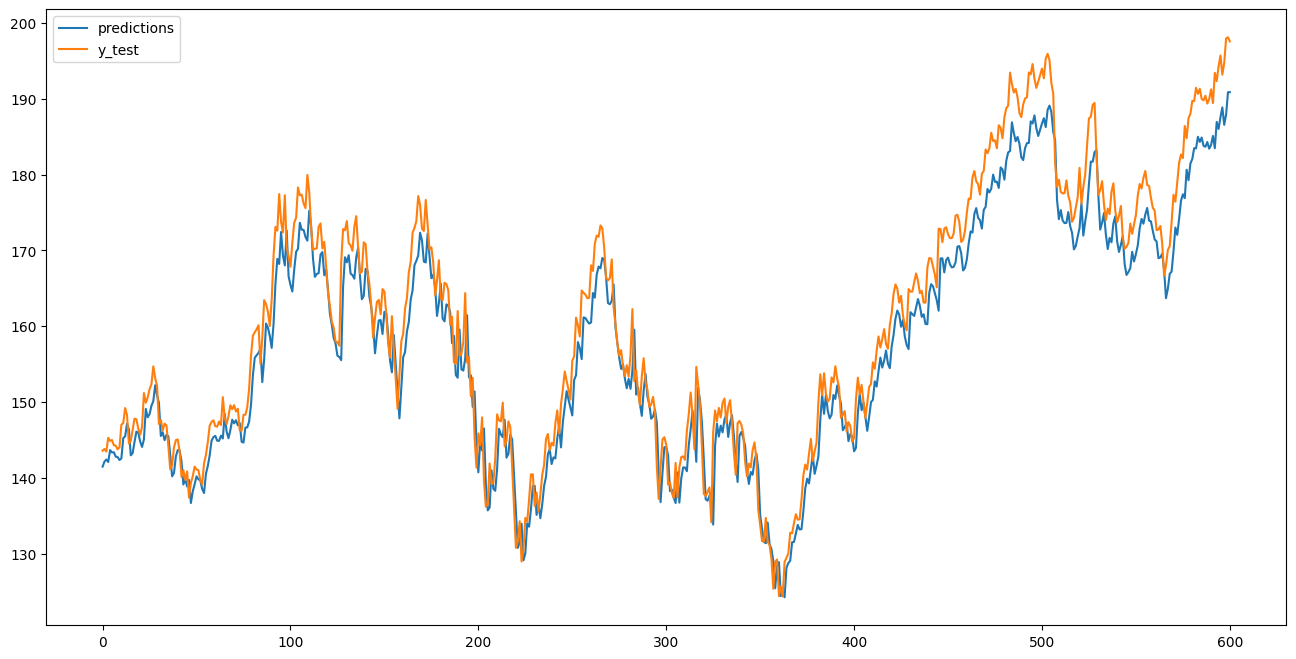

In [ ]:
model_result = pd.DataFrame(
    {
        "predictions" : predictions.flatten(),
        "y_test" : y_test.flatten()
    }
)

model_result.plot(figsize = (16, 8))

Model's predictions closely align with the actual values represented by y_test, indicating a favorable performance. When examining the plot of y_test and predictions, the proximity of the two lines implies that the model is effectively capturing the underlying patterns in the data. This alignment is indicative of a well-fitted model, demonstrating that it can generalize well to unseen data. The closeness of the lines suggests that the model has learned the relationships between the input features and the target variable, providing accurate predictions.

In [ ]:
model_result

,predictions,y_test
0,141.462524,143.569794
1,142.120895,143.786682
2,142.408035,143.451523
3,142.067978,145.265381
4,143.643875,144.861160
5,143.339203,144.969604
6,143.359756,144.278534
7,142.773819,144.229172
8,142.727631,143.745407
9,142.328827,144.002106


<Axes: >

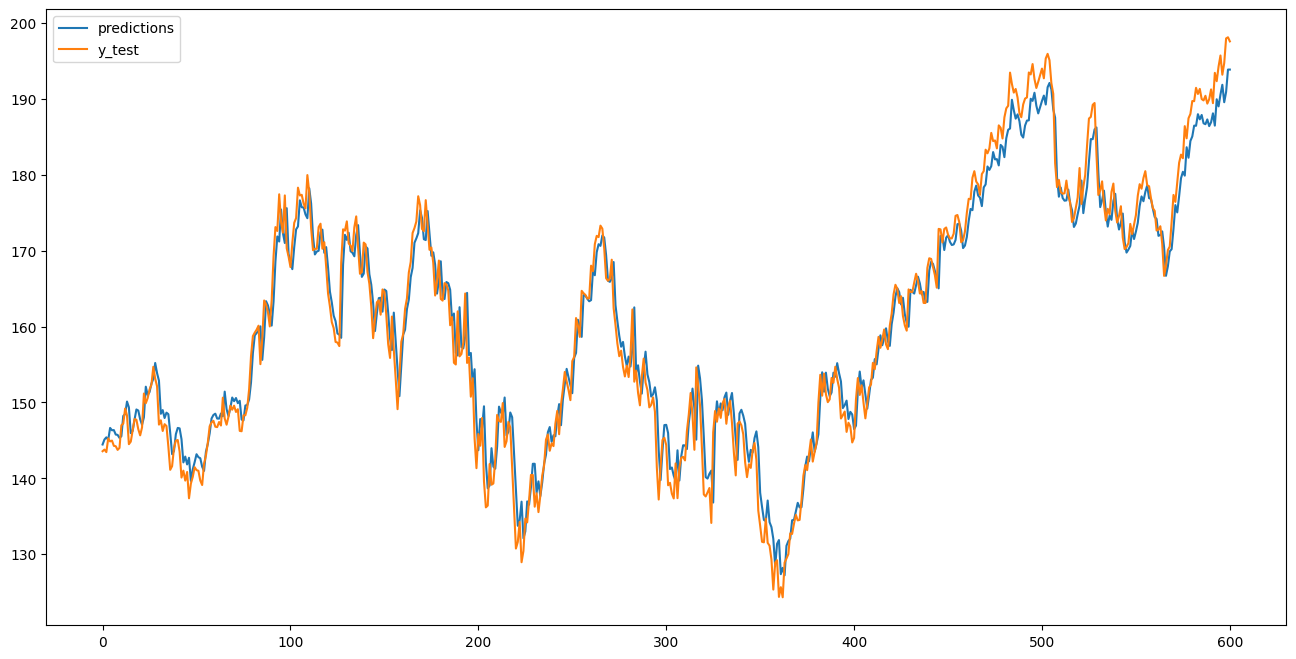

In [ ]:
model_result["predictions"] += np.abs(np.mean(model_result["predictions"] - model_result["y_test"]))
model_result.plot(figsize = (16, 8))

The approach of adding the absolute mean of the difference between y_test and predictions to the predictions themselves suggests a form of post-processing or adjustment to improve the alignment between the model's predictions and the actual values. This technique indicates an effort to address potential biases or systematic errors in the initial predictions.

By adding the absolute mean of the differences, you are essentially making an adjustment that takes into account the average magnitude of the errors in the original predictions. This strategy can be effective in cases where the model consistently underestimates or overestimates the target variable. The goal is to bring the predictions closer to the true values and, in turn, enhance the overall accuracy and reliability of the model.

In [ ]:
rmse2 = np.sqrt((np.mean(model_result["predictions"] - model_result["y_test"])) ** 2)
rmse2

6.22030502547837e-06

In [ ]:
model_result

,predictions,y_test
0,144.455658,143.569794
1,145.114029,143.786682
2,145.401169,143.451523
3,145.061111,145.265381
4,146.637009,144.861160
5,146.332336,144.969604
6,146.352890,144.278534
7,145.766953,144.229172
8,145.720764,143.745407
9,145.321960,144.002106


In [ ]:
predictions = np.reshape(model_result["predictions"].values, (model_result.shape[0], 1))
predictions

array([[144.45566],
       [145.11403],
       [145.40117],
       [145.06111],
       [146.63701],
       [146.33234],
       [146.35289],
       [145.76695],
       [145.72076],
       [145.32196],
       [145.53873],
       [148.21638],
       [148.45126],
       [150.11452],
       [149.35446],
       [145.94843],
       [146.23871],
       [147.72871],
       [149.06906],
       [148.93188],
       [147.77003],
       [147.05714],
       [148.04305],
       [152.07028],
       [150.9669 ],
       [151.37265],
       [152.48026],
       [153.1009 ],
       [155.1942 ],
       [153.85083],
       [152.86871],
       [148.49939],
       [148.9881 ],
       [147.94397],
       [148.64934],
       [148.45474],
       [145.9885 ],
       [143.17719],
       [143.6064 ],
       [145.81464],
       [146.63863],
       [146.57715],
       [145.15909],
       [142.09447],
       [142.86534],
       [141.83015],
       [142.71043],
       [139.65266],
       [141.1949 ],
       [142.12816],


In [ ]:
y_test

array([[143.5697937 ],
       [143.78668213],
       [143.45152283],
       [145.26538086],
       [144.86116028],
       [144.96960449],
       [144.27853394],
       [144.22917175],
       [143.7454071 ],
       [144.00210571],
       [146.99351501],
       [147.20083618],
       [149.19511414],
       [148.27696228],
       [144.4957428 ],
       [144.83140564],
       [146.3024292 ],
       [147.80308533],
       [147.7142334 ],
       [146.47026062],
       [145.66069031],
       [146.70721436],
       [151.16963196],
       [149.89607239],
       [150.56736755],
       [151.69288635],
       [152.33459473],
       [154.69416809],
       [153.13430786],
       [152.10752869],
       [147.07246399],
       [147.64509583],
       [146.23329163],
       [147.13174438],
       [146.89479065],
       [144.19955444],
       [141.11930847],
       [141.60305786],
       [143.99223328],
       [144.95974731],
       [145.04858398],
       [143.51835632],
       [140.10240173],
       [141

In [ ]:
train = df[: train_len]
valid = df[train_len : ]
valid["predictions"] = predictions

<ipython-input-26-8bbea14aa2eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predictions"] = predictions


In [ ]:
valid

,open,high,low,close,volume,adj_close,predictions
Date,,,,,,,
2021-07-29 00:00:00-04:00,142.633301,144.466862,142.524864,143.569794,56699500,143.569794,144.455658
2021-07-30 00:00:00-04:00,142.327724,144.250003,142.061557,143.786682,70440600,143.786682,145.114029
2021-08-02 00:00:00-04:00,144.279579,144.861189,143.185357,143.451523,62880000,143.451523,145.401169
2021-08-03 00:00:00-04:00,143.737410,145.935708,143.116360,145.265381,64786600,145.265381,145.061111
2021-08-04 00:00:00-04:00,145.176619,145.689216,144.200686,144.861160,56368300,144.861160,146.637009
2021-08-05 00:00:00-04:00,144.890740,145.738516,144.092256,144.969604,46397700,144.969604,146.332336
2021-08-06 00:00:00-04:00,144.485866,145.236180,143.775036,144.278534,54126800,144.058534,146.352890
2021-08-09 00:00:00-04:00,144.337771,144.831402,143.666440,144.229172,48908700,144.229172,145.766953
2021-08-10 00:00:00-04:00,144.574704,145.828531,143.449225,143.745407,69023100,143.745407,145.720764


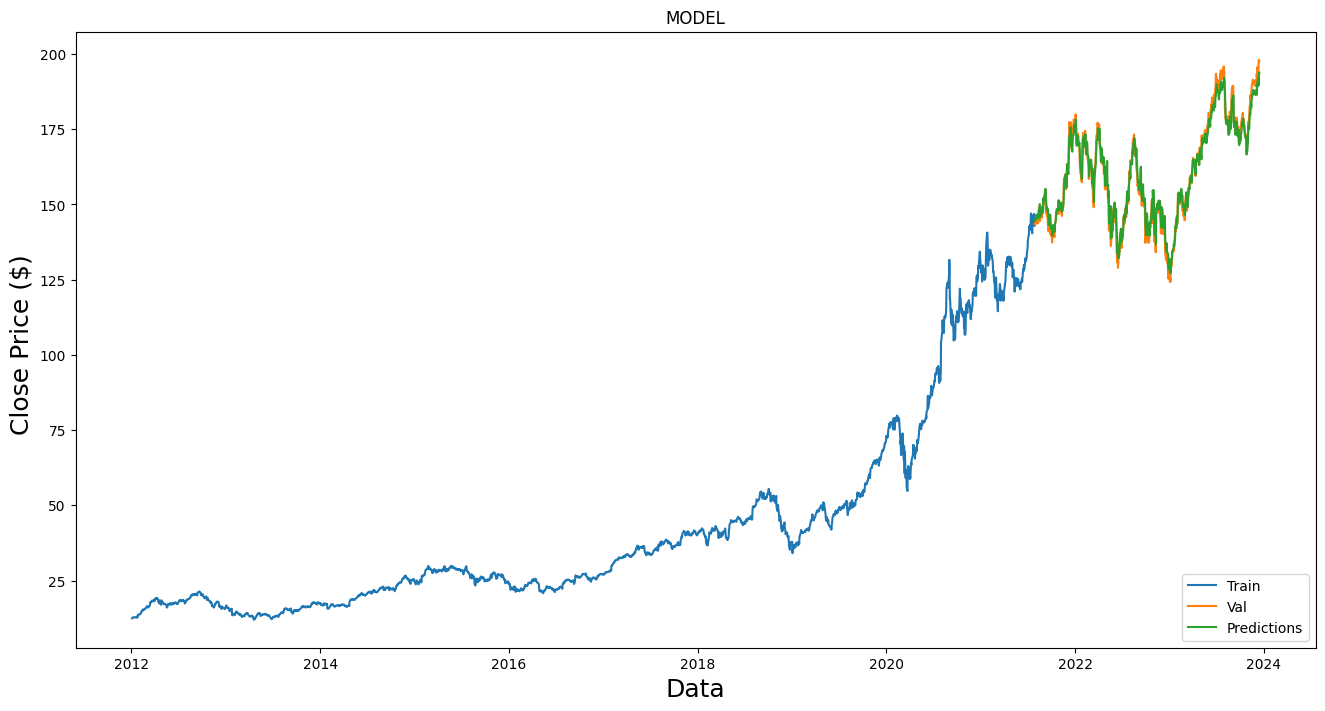

In [ ]:
plt.figure(figsize = (16, 8))
plt.title("MODEL")
plt.xlabel("Data",fontsize = 18)
plt.ylabel("Close Price ($) ", fontsize = 18)
plt.plot(train["close"])
plt.plot(valid[["close", "predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

And this is the final graph showing how accurate our model it.

In [ ]:
valid[["close", "predictions"]]

,close,predictions
Date,,
2021-07-29 00:00:00-04:00,143.569794,144.455658
2021-07-30 00:00:00-04:00,143.786682,145.114029
2021-08-02 00:00:00-04:00,143.451523,145.401169
2021-08-03 00:00:00-04:00,145.265381,145.061111
2021-08-04 00:00:00-04:00,144.861160,146.637009
2021-08-05 00:00:00-04:00,144.969604,146.332336
2021-08-06 00:00:00-04:00,144.278534,146.352890
2021-08-09 00:00:00-04:00,144.229172,145.766953
2021-08-10 00:00:00-04:00,143.745407,145.720764
